In [1]:
import pandas as pd
import ast
import warnings
import re
from konlpy.tag import *
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'HYGothic-Medium'

warnings.filterwarnings('ignore')

In [2]:
before_wellness = pd.read_excel("data/코로나이전_웰니스관광.xlsx")

In [3]:
before_wellness.head()

,url,date,title,hashtags,contents
0,https://blog.naver.com/sendex?Redirect=Log&log...,2017.09.15.,웰니스 관광 어떤 것이 있나 확인해볼까,"['#웰니스', '#웰니스관광', '#웰니스관광산업', '#관광산업', '#관광활성...",['안녕하세요~SENDEX 2017 사무국입니다 :)역대 최장 황금연휴가 될 이번 ...
1,https://blog.naver.com/we-korea?Redirect=Log&l...,2017.08.29.,웰니스관광으로 여행과 건강을,"['#웰니스관광', '#정책기자단', '#정책브리핑']","[""'여보, 우리 숲 보면서 스파하러 가요~'"", '웰니스 = 웰빙 + 건강신체적,..."
2,https://blog.naver.com/mcstkorea?Redirect=Log&...,2017.07.26.,[영상] #건강#힐링#여행_웰니스관광! ‘동의보감촌’,"['#건강', '#힐링', '#한방', '#동의보감촌', '#웰니스관광']","['', '문화체육관광부는 최근 웰니스 관광이 각광받는 추세를 반영해 관광분야를 한..."
3,https://blog.naver.com/geochanggun?Redirect=Lo...,2018.05.29.,[거창군] 제1기 웰니스관광코디네이터 전문가 양성과정 교육생...,"['#항노화', '#웰니스관광코디네이터', '#항노화산업', '#거창군', '#웰빙...","['웰니스관광 및 항노화산업에 관심을 갖고, 웰니스관광코디네이터로서 자긍심과 사명감..."
4,https://blog.naver.com/sinnanie?Redirect=Log&l...,2018.01.12.,[배경지식 넓히기] 명품 '웰니스 관광',"['#시사원정대', '#동아이지에듀', '#어린이시사', '#웰니스관광', '#한국...","[""시사원정대 1월호 시사 똑똑북맞춤사설 배경지식 넓히기명품 '웰니스 관광'!"", ..."


# 데이터 전처리

- hashtags랑 contents 데이터 리스트로 변환
- hashtags랑 contents 데이터 둘 다 없을 경우 => 행삭제

In [4]:
before_wellness = before_wellness.drop([145])

In [5]:
before_wellness["hashtags"] = before_wellness["hashtags"].apply(ast.literal_eval)
before_wellness["contents"] = before_wellness["contents"].apply(ast.literal_eval)

In [6]:
before_wellness = before_wellness[(before_wellness["hashtags"].str.len() != 0) | (before_wellness["contents"].str.len() != 0)]

In [7]:
len(before_wellness)

1833

- hashtags랑 contents 데이터 합치기

In [8]:
before_wellness["info"] = before_wellness["hashtags"] + before_wellness["contents"]

- info : 본문 내용과 관련없는 특수문자 제거, 명사 추출

In [9]:
before_wellness["info"] = before_wellness["info"].map(lambda x: ' '.join(x))

In [10]:
before_wellness["info"] = before_wellness["info"].map(lambda x: re.compile(r'[^ A-Za-z0-9가-힣+]').sub('', x))

In [11]:
okt = Okt()
before_wellness["info"] = before_wellness["info"].map(lambda x: okt.nouns(x))

In [12]:
before_wellness["info"]

0       [웰니스, 웰니스관광, 웰니스관광, 산업, 관광, 산업, 관광, 활성화, 웰니스관광...
1       [웰니스관광, 정책, 자단, 정책, 브리핑, 여보, 우리, 숲, 스파, 가요, 웰니...
2       [건강, 힐링, 방, 동의보감, 촌, 웰니스관광, 문화, 체육관, 광부, 최근, 웰...
3       [항노화, 웰니스관광, 코, 디네, 터, 항노화, 산업, 거창군, 웰빙, 관광, 코...
4       [원정, 동아, 에듀, 어린이, 시사, 웰니스관광, 한국, 관광, 공사, 진안, 홍...
                              ...                        
1994    [문경역, 권, 토지, 투자, 경북, 의회, 나기, 보, 의원, 김천, 주문, 경간...
1995    [강화도, 땅, 강화, 화도, 인천, 토지, 민통선, 관광, 코스, 강화, 평화, ...
1996    [스페인, 산티아고, 걷기, 여행, 가족, 여행, 종지부, 일상, 위, 여행, 꿈,...
1997    [전남, 문화, 관광, 재단, 다국적, 결혼, 이민자, 비롯, 귀화, 유학생, 대상...
1998    [관광, 승인, 외래, 관광객, 실태, 조사, 결과, 발표, 한국, 외래, 관광객,...
Name: info, Length: 1833, dtype: object

# WordCloud

In [13]:
word_tokens = list(before_wellness["info"])
word_tokens = sum(word_tokens, [])

In [14]:
stop_words = []

f = open("data/stopwords-ko.txt", encoding = "utf-8")
for data in f:
    stop_words.append(data.rstrip('\n'))
    
f.close()

In [15]:
total_words = []

for w in word_tokens:
    if w not in stop_words:
        total_words.append(w)

result_words = ' '.join(total_words)

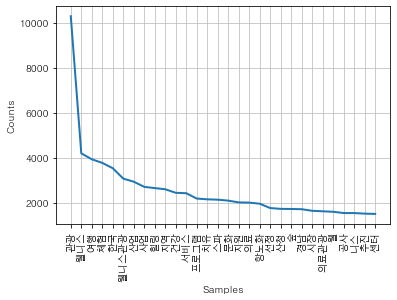

In [16]:
from nltk import Text

num_words = Text(total_words)
num_words.plot(30)
plt.show()

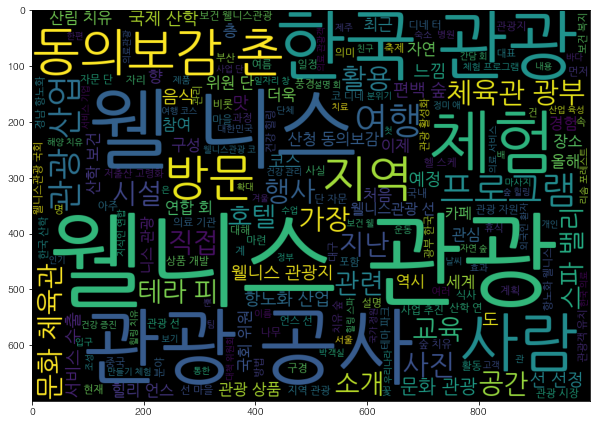

In [17]:
from wordcloud import WordCloud
font_path = 'NanumGothic.ttf'
wcloud = WordCloud(font_path = font_path, width = 1000, height = 700).generate(result_words)

plt.figure(figsize = (10,10))
plt.imshow(wcloud)
wcloud.to_file('웰니스관광_코로나전.png')

# Word2vec

In [18]:
def korean_stop_words(x, stop_words):
    result_words = [word for word in x if not word in stop_words]
    return result_words

dataset = before_wellness["info"].apply(lambda x: korean_stop_words(x, stop_words))

In [19]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(dataset, sg = 1, window = 10, min_count = 1)
model.init_sims(replace=True)

In [20]:
print("웰니스관광와 힐링여행의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "힐링여행")))

웰니스관광와 힐링여행의 단어간 유사도는 0.60 입니다.


In [21]:
print("웰니스관광와 힐링의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "힐링")))

웰니스관광와 힐링의 단어간 유사도는 0.47 입니다.


In [22]:
print("웰니스관광와 자연의 단어간 유사도는 %.2f 입니다." % (model.wv.similarity("웰니스관광", "자연")))

웰니스관광와 자연의 단어간 유사도는 0.37 입니다.
